<a href="https://colab.research.google.com/github/nourelkhalawy/capstone/blob/master/OTEX_Stock_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#OTEX Stock Price Forecasts

## Importing Libraries

Here, I am importing the libraries that I will need to plot and predict the stock prices (Daily High) using different technical approaches discussed in the paper.

In [ ]:
# connecting to the drive to import the necessary csv files
from google.colab import drive
# connect the notebook to the file path
import os
# importing pandas to read the csv file
import pandas as pd
# importing numpy to use numpy arrays to  perfom calculations on the data
import numpy as np
# importing matplotlib to visualize the graphs
import matplotlib.pyplot as plt
# importing tendorflow to build the deep learning models
import tensorflow as tf
# importing keras because we will use layers in our models from its library
from tensorflow import keras
# importing image from matplotlib to visualize the images
import matplotlib.image  as mpimg

## Mounting Drive

Here, I am connecting the notebook to my google drive to import the dataset. You can access the datasets I am importing here: https://drive.google.com/drive/folders/1fexs6uozLEGhTPjplWZhecoSH7Df5EJL?usp=sharing

In [ ]:
# mounting my drive
drive.mount('drive', force_remount=True)

Mounted at drive


In [ ]:
# adding the dataset file path to my system to import the dataset
os.chdir('drive/My Drive/datasets/new_stock')

## Data Exploration

Here, I will explore the dataset and clean it to make it ready for training.

In [ ]:
# reading the dataset file using read_csv from pandas library
data = pd.read_csv('OTEX.csv')

In [ ]:
# looking at the dataset
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-24,3.218750,3.31250,2.656250,2.750000,2.403335,37326400
1,1996-01-25,2.777344,2.81250,2.460938,2.593750,2.266782,8926400
2,1996-01-26,2.578125,2.59375,2.375000,2.429688,2.123402,3888000
3,1996-01-29,2.406250,2.46875,2.187500,2.218750,1.939055,3508000
4,1996-01-30,2.281250,2.31250,2.187500,2.187500,1.911744,1336800


In [ ]:
#looking at the dataset columns data types and checking if there is empty cells
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6264 entries, 0 to 6263
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6264 non-null   object 
 1   Open       6264 non-null   float64
 2   High       6264 non-null   float64
 3   Low        6264 non-null   float64
 4   Close      6264 non-null   float64
 5   Adj Close  6264 non-null   float64
 6   Volume     6264 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 342.7+ KB


## Data Processing and Segmentation

In this section, processed the data into numpy arrays for easier calculation handling, especially when using deep neural networks. I also split the data into training and validation sets to test the performance of every method on the validation set after training it on the training set. Note that I changed the time to a list of numbers instead of dates for easier handling.

In [ ]:
# creating a numpy array that contains only the High stock prices
series = np.array(data['High'])

In [ ]:
# creating a numpy array that contains the time
time = np.array(data['Date'])

In [ ]:
# identifying the begining of the 20-year data
time_start = int(np.where(time == '1999-12-31')[0])

In [ ]:
# identifying the end of the 20-year data
time_stop = int(np.where(time == '2019-12-31')[0])

In [ ]:
# selecting the data points that fall between the start and end dates
series = series[time_start:time_stop]

In [ ]:
# selecting the dates that fall between the start and end dates
time = time[time_start:time_stop]

In [ ]:
# changing time dates to numbers
time = [i for i in range(len(time))]

In [ ]:
# converting the list of numbers into numpy array
time = np.array(time)

In [ ]:
# identifying the split time for the 5-year validation set
split_time = 3542
# selecting the time train data
time_train = time[:split_time]
# selecting the stock price train data
x_train = series[:split_time]
# selecting the time validation data
time_valid = time[split_time:]
# selecting the stock price validation data
x_valid = series[split_time:]
# window size to be used in the models
window_size= 10
# batch size of the input data into the different neural networks
batch_size= 64
# shuffle buffer size to speed training
shuffle_buffer_size= 1000

## Data Visualization

In [ ]:
def plot_series(time1, series1, label1, time2 = [], series2 = [], label2 ="",format="-", start=0, end=None, title=""):
  """
  defining the plot function for plotting all the true and forcasted prices 
  together in the same graph to mak the code clean and concise
  """
  fig, ax = plt.subplots(figsize=(10, 6))
  ax.plot(time1[start:end], series1[start:end], label = label1)
  ax.plot(time2[start:end], series2[start:end], label = label2)
  plt.xlabel("Time in Days")
  plt.ylabel("Stock High Value in USD")
  plt.grid(True)
  legend = ax.legend(shadow=True, fontsize='x-large')
  title = ax.set_title(title)
  plt.show()


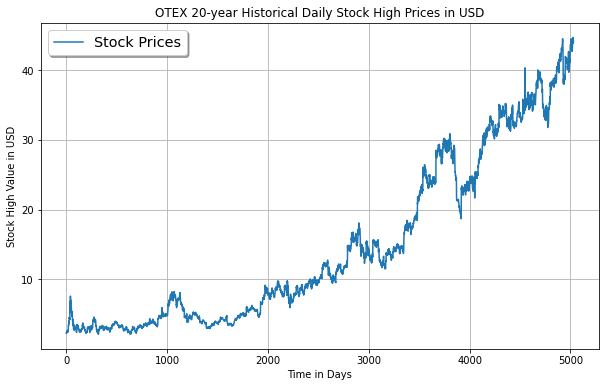

In [ ]:
# plotting the stock prices for the whole dataset
plot_series(time, series, label1 = 'Stock Prices', title='OTEX 20-year Historical Daily Stock High Prices in USD')

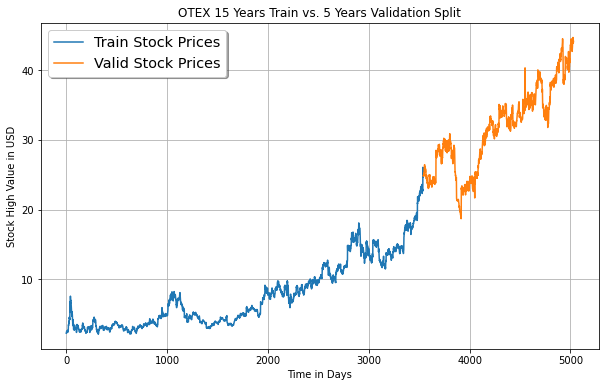

In [ ]:
# plotting the train and validation data
plot_series(time1= time_train, series1= x_train, label1= 'Train Stock Prices',
            time2= time_valid, series2= x_valid, label2= 'Valid Stock Prices',
            title='OTEX 15 Years Train vs. 5 Years Validation Split')

## 1. Naive Forecasting

In [ ]:
# naive forecast by shifting the dataset 1 time-slot
naive_forecast = series[split_time - 1:-1]

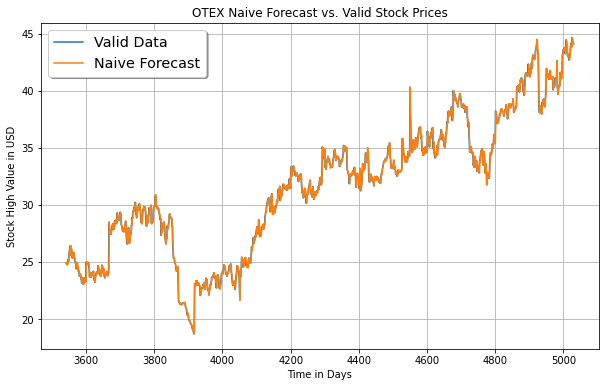

In [ ]:
# plotting the forecasted and validation data
plot_series(time1= time_valid, series1= x_valid, label1= 'Valid Data',
            time2= time_valid, series2= naive_forecast, label2= 'Naive Forecast',
            title='OTEX Naive Forecast vs. Valid Stock Prices')

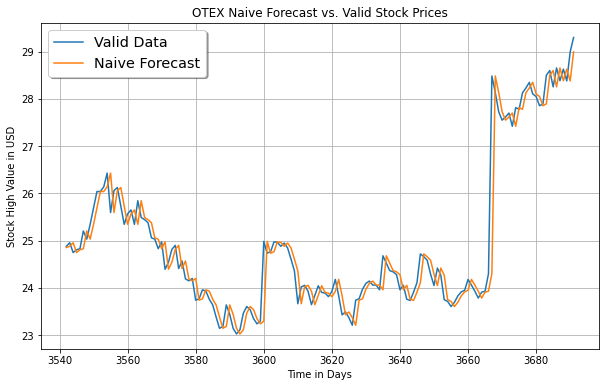

In [ ]:
# Zooming in the same plot above
plot_series(time1= time_valid, series1= x_valid, label1= 'Valid Data',
            time2= time_valid, series2= naive_forecast, label2= 'Naive Forecast',
            title='OTEX Naive Forecast vs. Valid Stock Prices', 
            start=0, end=150)

In [ ]:
# measring the error using Mean squared error and mean absolute error
print('MSE:', keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print('MAE:', keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())
# percentage of mean absolute error 
print('MAPE', keras.metrics.mean_absolute_percentage_error(x_valid, naive_forecast).numpy())

MSE: 0.2167037556466488
MAE: 0.28613838415043646
MAPE 0.917407504221711


## 2. Moving Average Forecasting

In [ ]:
def moving_average_forecast(series, window_size):
  """
  Forecasts the mean of the last few values.
  If window_size=1, then this is equivalent to naive forecast
  """
  forecast = []
  for time in range(len(series) - window_size):
    forecast.append(series[time:time + window_size].mean())
  return np.array(forecast)

In [ ]:
# moving average with window size 10
moving_avg = moving_average_forecast(series, 10)[split_time - 10:]

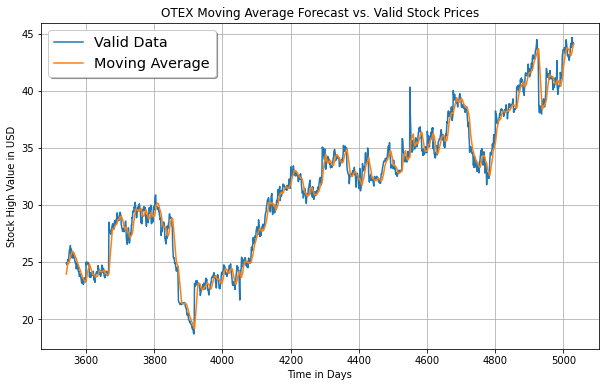

In [ ]:
# plotting the forecasted and validation data
plot_series(time1= time_valid, series1= x_valid, label1= 'Valid Data',
            time2= time_valid, series2= moving_avg, label2= 'Moving Average',
            title='OTEX Moving Average Forecast vs. Valid Stock Prices')

In [ ]:
# measring the error using Mean squared error and mean absolute error
print('MSE:',keras.metrics.mean_squared_error(x_valid, moving_avg).numpy())
print('MAE:',keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())
# percentage of mean absolute error 
print('MAPE', keras.metrics.mean_absolute_percentage_error(x_valid, moving_avg).numpy())

MSE: 0.7093019517780891
MAE: 0.6044159029550034
MAPE 1.96700751906228


## Window Creation for Deep Learning Training

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  """
  splitting the dataset into windows to train the neural networks
  """
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

## Forecast Result Function

In [ ]:
def forecast_result(model, series=series, window_size = window_size, time = time, split_time = split_time):
  """
  simplifying the model prediction into a reusable function
  """
  forecast = []
  for time in range(len(series) - window_size):
    forecast.append(model.predict(series[time:time + window_size][np.newaxis]))
  forecast = forecast[split_time-window_size:]
  results = np.array(forecast)[:, 0, 0]
  return results

## 3. Linear Regression Network

In [ ]:
# windowed dataset
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

#linear regression model
input_layer = tf.keras.layers.Dense(1, input_shape=[window_size])
regr = tf.keras.models.Sequential([input_layer])
regr.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9))
regr.fit(dataset,epochs=100,verbose=0)

# linear regression weights
print("Layer weights {}".format(input_layer.get_weights()))

# forecasted results
reg_pred = forecast_result(model=regr)


Layer weights [array([[-0.20375635],
       [-0.09256623],
       [-0.34298775],
       [ 0.4636848 ],
       [-0.2067794 ],
       [-0.08491943],
       [ 0.836361  ],
       [ 0.222947  ],
       [ 0.43315178],
       [-0.02666092]], dtype=float32), array([0.02318686], dtype=float32)]


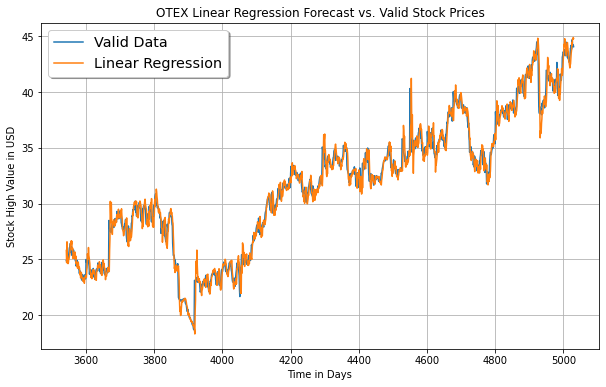

In [ ]:
# plotting the forecasted and validation data
plot_series(time1= time_valid, series1= x_valid, label1= 'Valid Data',
            time2= time_valid, series2= reg_pred, label2= 'Linear Regression',
            title='OTEX Linear Regression Forecast vs. Valid Stock Prices')

In [ ]:
# measring the error using Mean squared error and mean absolute error
print('MSE:',keras.metrics.mean_squared_error(x_valid, reg_pred).numpy())
print('MAE:',keras.metrics.mean_absolute_error(x_valid, reg_pred).numpy())
# percentage of mean absolute error 
print('MAPE', keras.metrics.mean_absolute_percentage_error(x_valid, reg_pred).numpy())

MSE: 0.7594641
MAE: 0.622096
MAPE 2.0100222


## 4. Deep Neural Neywork (DNN)

In [ ]:
# deep neural network model with three dense layers
dnn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

dnn.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9))
dnn.fit(dataset,epochs=100,verbose=0)

# forecasted results
dnn_pred = forecast_result(model=dnn)

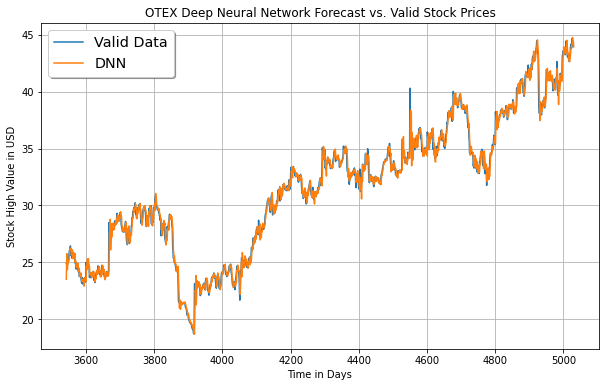

In [ ]:
# plotting the forecasted and validation data
plot_series(time1= time_valid, series1= x_valid, label1= 'Valid Data',
            time2= time_valid, series2= dnn_pred, label2= 'DNN',
            title='OTEX Deep Neural Network Forecast vs. Valid Stock Prices')

In [ ]:
# measring the error using Mean squared error and mean absolute error
print('MSE:',keras.metrics.mean_squared_error(x_valid, dnn_pred).numpy())
print('MAE:',keras.metrics.mean_absolute_error(x_valid, dnn_pred).numpy())
# percentage of mean absolute error 
print('MAPE', keras.metrics.mean_absolute_percentage_error(x_valid, dnn_pred).numpy())

MSE: 0.3279983
MAE: 0.38377556
MAPE 1.2378167


## 5. Recurrent Neural Network

In [ ]:
# recurrent neural netwrok with 2 recurrent layers
rnn = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  tf.keras.layers.SimpleRNN(40, return_sequences=True),
  tf.keras.layers.SimpleRNN(40),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
rnn.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
rnn.fit(dataset, epochs=100, verbose=0)

rnn_pred = forecast_result(model=rnn)

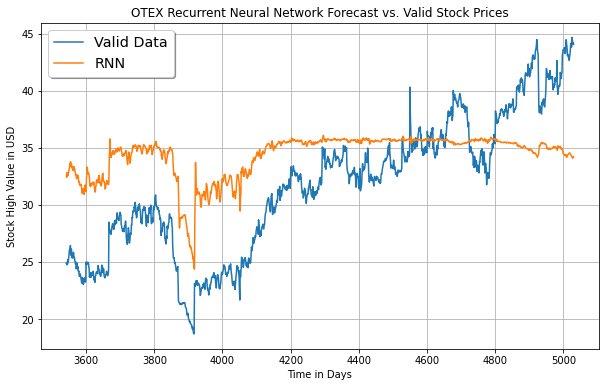

In [ ]:
# plotting the forecasted and validation data
plot_series(time1= time_valid, series1= x_valid, label1= 'Valid Data',
            time2= time_valid, series2= rnn_pred, label2= 'RNN',
            title='OTEX Recurrent Neural Network Forecast vs. Valid Stock Prices')

In [ ]:
# measring the error using Mean squared error and mean absolute error
print('MSE:',keras.metrics.mean_squared_error(x_valid, rnn_pred).numpy())
print('MAE:',keras.metrics.mean_absolute_error(x_valid, rnn_pred).numpy())
# percentage of mean absolute error 
print('MAPE', keras.metrics.mean_absolute_percentage_error(x_valid, rnn_pred).numpy())

MSE: 29.998346
MAE: 4.800136
MAPE 16.781612


## 6. Long Short-Term Memory Network (LSTM)


In [ ]:
# deep neiral network with teo lstm layers
lstm = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])


lstm.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9),metrics=["mae"])
lstm.fit(dataset,epochs=100,verbose=0)
#prediction
lstm_pred = forecast_result(model=lstm)

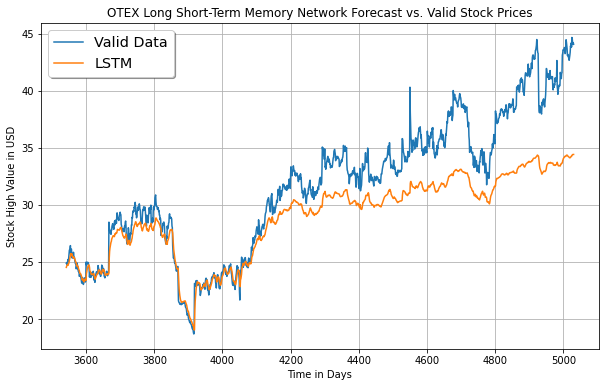

In [ ]:
# plotting the forecasted and validation data
plot_series(time1= time_valid, series1= x_valid, label1= 'Valid Data',
            time2= time_valid, series2= lstm_pred, label2= 'LSTM',
            title='OTEX Long Short-Term Memory Network Forecast vs. Valid Stock Prices')

In [ ]:
# measring the error using Mean squared error and mean absolute error
print('MSE:',keras.metrics.mean_squared_error(x_valid, lstm_pred).numpy())
print('MAE:',keras.metrics.mean_absolute_error(x_valid, lstm_pred).numpy())
# percentage of mean absolute error 
print('MAPE', keras.metrics.mean_absolute_percentage_error(x_valid, lstm_pred).numpy())

MSE: 13.744025
MAE: 2.7659318
MAPE 7.7184224
